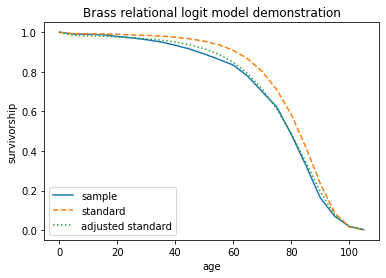

In [36]:
##############################################################################################################################
##PYTHON CODE (notebook, .ipynb file using https://jupyter.org/ for https://www.python.org/) FOR THE BRASS RELATIONAL LOGIT MODEL OF MORTALITY
##FOLLOWING R CODE AVAILABLE VIA: https://applieddemogtoolbox.github.io/#BrassMortality 
##https://raw.githubusercontent.com/AppliedDemogToolbox/Hunsinger_BrassRelationalLogit/master/BrassRelationalLogitCode.R
##
##EDDIE HUNSINGER, AUGUST 2022
##https://edyhsgr.github.io/ 
##edyhsgr@gmail.com
##
##EXAMPLE DATA IS LINKED, SO YOU SHOULD BE ABLE TO RUN IT WITHOUT ANY MODIFICATIONS IN JUPYTER
##
##THERE IS NO WARRANTY FOR THIS CODE
##
##USEFUL PYTHON INFO BY UC DAVIS PROF NORM MATLOFF: https://web.cs.ucdavis.edu/~matloff/matloff/public_html/python.html 
##############################################################################################################################

##Calling libraries aka packages
import pandas as pandas  #typically 'import pandas as pd'; a Python library with data analysis tools including to plot, can install eg with 'pip install pandas'
import numpy as numpy  #typically 'import numpy as np'; a Python library with numerical analysis tools, can install eg with 'pip install numpy'

lxSample = pandas.read_csv("https://raw.githubusercontent.com/AppliedDemogToolbox/Hunsinger_BrassRelationalLogit/master/lxSample.csv")
lxSSA = pandas.read_csv("https://raw.githubusercontent.com/AppliedDemogToolbox/Hunsinger_BrassRelationalLogit/master/lxSSA.csv")

##Function making and using
def logit(logitInput):  #Define a function called 'logit'; indentation defines the end of the function
  logitOutput = numpy.log(logitInput/(1-logitInput))
  return logitOutput  

def Brass(lx,lxbase):  
  Yx = 0.5*logit(lx)  #Using logit() function created above
  Yxbase = 0.5*logit(lxbase)
  BetaAlpha = numpy.polyfit(Yx[1:len(Yx)],Yxbase[1:len(Yxbase)],1)  #A first (the reference to 1) degree polynomial is a line; function gives slope then intercept
  Beta = BetaAlpha[0]
  Alpha = BetaAlpha[1]
  return Alpha, Beta
BrassAlphaBeta = Brass(lxSSA['2000f'],lxSample['2000f'])  #Apply the function
#print(BrassAlphaBeta)  #Alpha is [0] and Beta is [1]

lxSample['Yx'] = 0.5*logit(lxSample['2000f'])
lxSSA['Yx'] = 0.5*logit(lxSSA['2000f'])

lxSSA['2000fAdjusted'] = 1/(1+numpy.exp(-2*BrassAlphaBeta[0]-2*BrassAlphaBeta[1]*lxSSA['Yx']))
#print(lxSSA.head())

lxSamplePlot = lxSample.plot(kind = 'line', x = 'x', y = '2000f')  #This object will be used in the next line
lxSSAPlot = lxSSA.plot(kind = 'line', linestyle='dashed', ax = lxSamplePlot, x = 'x', y = '2000f')
lxSSAAdjustedPlot = lxSSA.plot(kind = 'line', linestyle='dotted', ax = lxSamplePlot, x = 'x', y = '2000fAdjusted')
lxPlot = lxSamplePlot.set_xlabel('age')
lxPlot = lxSamplePlot.set_ylabel('survivorship')
lxPlot = lxSamplePlot.legend(['sample', 'standard', 'adjusted standard'])
lxPlot = lxSamplePlot.set_title(label = 'Brass relational logit model demonstration')


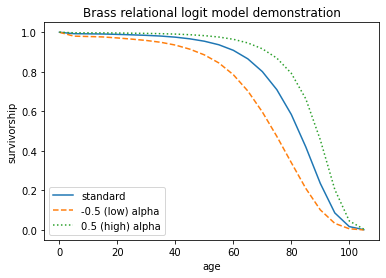

In [37]:
lxSSA['2000fLowAlpha'] = 1/(1+numpy.exp(-2*-0.5-2*lxSSA['Yx']))
lxSSA['2000fHighAlpha'] = 1/(1+numpy.exp(-2*0.5-2*lxSSA['Yx']))
#print(lxSSA.head())

lxSSAPlot = lxSSA.plot(kind = 'line', x = 'x', y = '2000f')  #This object will be used in the next line
lxSSAPlot = lxSSA.plot(kind = 'line', linestyle='dashed', ax = lxSSAPlot, x = 'x', y = '2000fLowAlpha')
lxSSAPlot = lxSSA.plot(kind = 'line', linestyle='dotted', ax = lxSSAPlot, x = 'x', y = '2000fHighAlpha')
lxPlot = lxSSAPlot.set_xlabel('age')
lxPlot = lxSSAPlot.set_ylabel('survivorship')
lxPlot = lxSSAPlot.legend(['standard', '-0.5 (low) alpha', '0.5 (high) alpha'])
lxPlot = lxSSAPlot.set_title(label = 'Brass relational logit model demonstration')


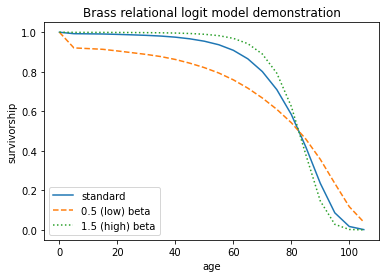

In [38]:
lxSSA['2000fLowBeta'] = 1/(1+numpy.exp(-2*0.5*lxSSA['Yx']))
lxSSA['2000fHighBeta'] = 1/(1+numpy.exp(-2*1.5*lxSSA['Yx']))
#print(lxSSA.head())

lxSSAPlot = lxSSA.plot(kind = 'line', x = 'x', y = '2000f')  #This object will be used in the next line
lxSSAPlot = lxSSA.plot(kind = 'line', linestyle='dashed', ax = lxSSAPlot, x = 'x', y = '2000fLowBeta')
lxSSAAdjustedPlot = lxSSA.plot(kind = 'line', linestyle='dotted', ax = lxSSAPlot, x = 'x', y = '2000fHighBeta')
lxPlot = lxSSAPlot.set_xlabel('age')
lxPlot = lxSSAPlot.set_ylabel('survivorship')
lxPlot = lxSSAPlot.legend(['standard', '0.5 (low) beta', '1.5 (high) beta'])
lxPlot = lxSSAPlot.set_title(label = 'Brass relational logit model demonstration')
